# Visualization of events, station, rays in csv files 


##  Fei Zhang
### 2018-09-06


In [1]:
!pwd


/g/data1a/ha3/fxz547/Githubz/passive-seismic/notebooks


In [2]:
import pandas as pd
import geopandas as geopd

import matplotlib.pyplot as plt
#from seismic.cluster.cluster import Grid2 
from seismic.traveltime.sort_rays import sort2

In [3]:
def csv2pdf(csvfile):
    """
    Read in a csv file into a pandas dataframe. 
    The column names should match the default. 
    delimiter/separator is whitespace
    """
    col_names=['source_block', 'station_block', 'residual', 'event_number', 
            'source_longitude','source_latitude','source_depth',  
            'station_longitude','station_latitude', 'observed_tt', 'locations2degrees',  'P_or_S']
    
    # finalpdf =  pd.read_csv(csvfile, header=None,  names=col_names) # , separator
    finalpdf =  pd.read_csv(csvfile,  sep='\s+', header=None,  names=col_names) # white space
    
    return finalpdf  #pandas_data_frame

In [4]:
def get_events(pdf):
    
    return geopdf_events_latlong

In [5]:
def get_stations(pdf):
    
    return geopdf_station_code_n_latlong

In [6]:
def get_rays(pdf):
    
    return geopdf_ray_lines

In [7]:
def plot_points_map(geopdf):
    
    return "path_figure.png"

In [8]:
def plot_line_map(geopdf):
    
    return "path_figure.png"

In [32]:


# P wave
#inputcsv='/g/data/ha3/fxz547/Githubz/passive-seismic/seismic_events_arrivals_P_0.csv'
#inputcsv='/g/data/ha3/fxz547/Githubz/passive-seismic/tempworks/outfile_P.csv'
inputcsv='/g/data/ha3/fxz547/travel_time_tomography/CSV_NewFormatAug10/FZ01-pst-cluster2/run3/sorted_region_P.csv'
residual_cutoff=5.0
sortedfile='sortedfile_P.csv'
sortedfile2= 'sortedfile2_P.csv'



# for S wave
#inputcsv='/g/data1a/ha3/fxz547/travel_time_tomography/run5_events_1deg/outfile_S.csv'
inputcsv='/g/data/ha3/fxz547/travel_time_tomography/CSV_NewFormatAug10/FZ01-pst-cluster2/run3/P_out.csv'
residual_cutoff=10.0
sortedfile='sortedfile_S.csv'
sortedfile2= 'sortedfile2_S.csv'

In [33]:
finalpdf = sort2(inputcsv,sortedfile,residual_cutoff)

#sort again should get identical rows. ALL reduced to a minimum set
#pdf2=sort2(sortedfile, sortedfile2, residual_cutoff )

# OR read in from already sorted (zoned) csv file
# finalpdf = csv2pdf(inputcsv)

In [34]:

finalpdf.shape

(194039, 14)

In [35]:
finalpdf.head()

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,locations2degrees,station_code,SNR,P_or_S
405703,130100,164337,0.05164,1077450326,124.7496,-0.0891,2.3538,133.92126,-23.672871,327.983316,25.208062,AS03,7.397719,1
405702,130100,175544,2.50000,1077450326,124.7496,-0.0891,2.3538,145.69160,-31.537500,434.034426,37.173454,CMSA,10.218068,1
7339,130102,177590,0.30000,1270453826,125.2391,-0.0797,0.0000,117.23900,-32.927700,402.372445,33.701074,NWAO,72.090342,1
204815,130104,176247,-9.75000,1394903694,125.6945,-0.1003,0.0000,141.59644,-31.875680,404.860909,35.152540,STKA,12.414271,1
155090,130105,158938,-7.61820,1364578624,126.0517,-0.0426,0.0000,134.37194,-19.958742,284.609031,21.518514,WC3,31.196631,1


In [36]:
pdf2= finalpdf

<Figure size 432x288 with 0 Axes>

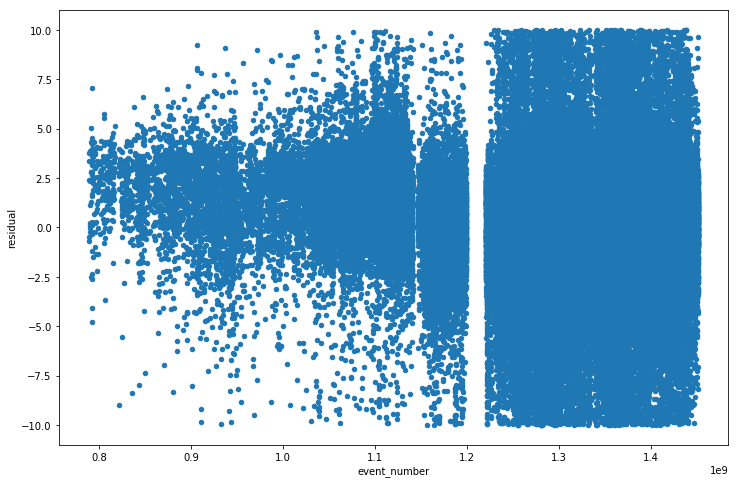

In [37]:
# plt.figure(); pdf2.plot(x='event_number', y='observed_tt')
# plt.figure(); pdf2.plot(x='event_number', y='source_depth')
# plt.figure(); pdf2.plot(x='event_number', y='locations2degrees')

plt.figure(); pdf2.plot.scatter(x='event_number', y='residual',figsize=(12,8))  # less than +-10s



<Figure size 432x288 with 0 Axes>

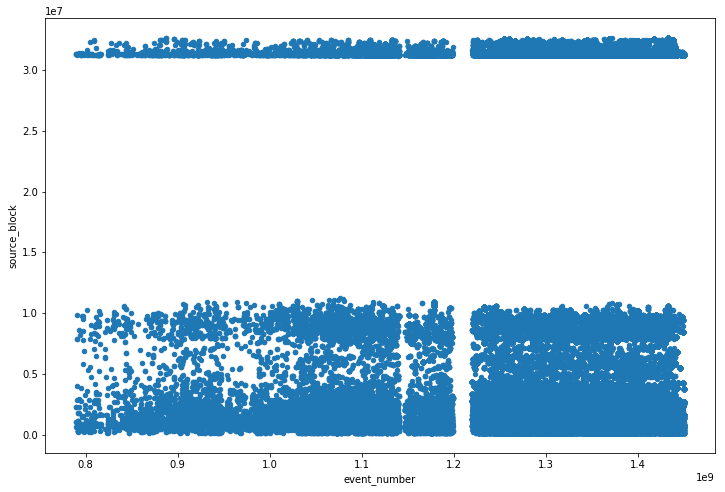

In [38]:
plt.figure(); pdf2.plot.scatter(x='event_number', y='source_block',figsize=(12,8)) 

<Figure size 432x288 with 0 Axes>

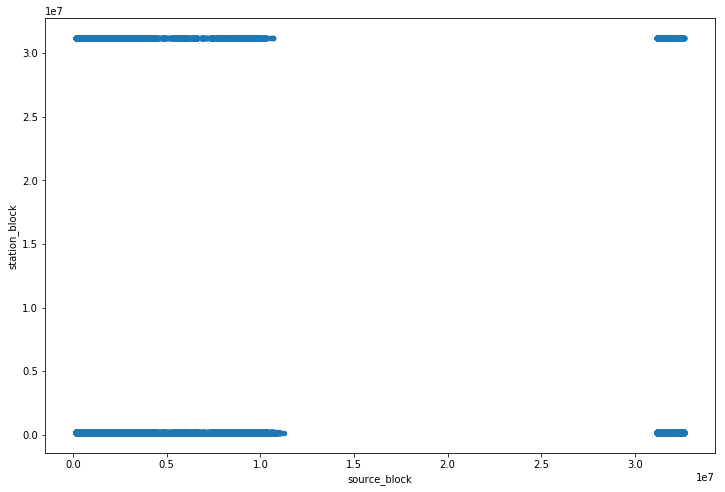

In [39]:
plt.figure(); pdf2.plot.scatter(x='source_block', y='station_block',figsize=(12,8))

<Figure size 432x288 with 0 Axes>

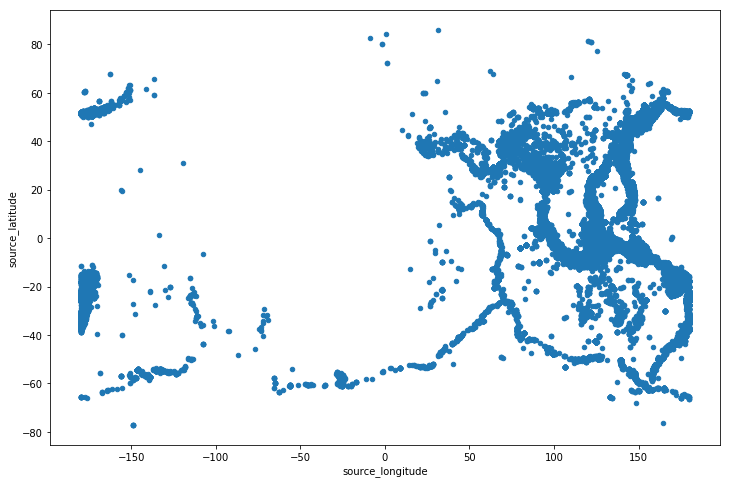

In [40]:
plt.figure(); pdf2.plot.scatter(x='source_longitude', y='source_latitude',figsize=(12,8))

<Figure size 432x288 with 0 Axes>

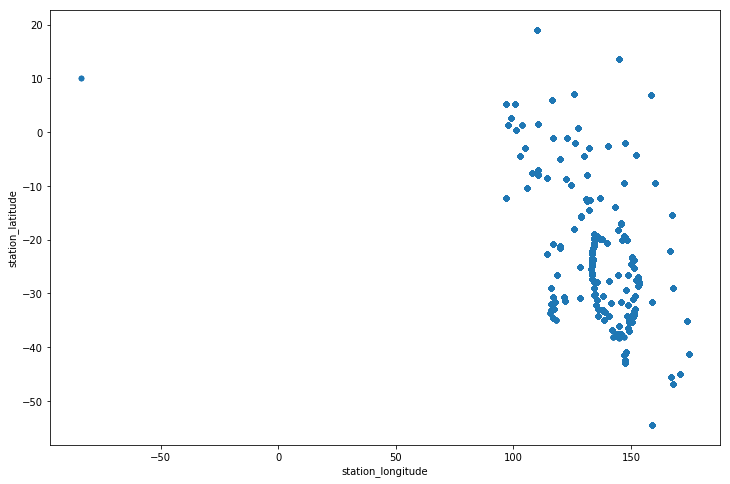

In [41]:
plt.figure(); pdf2.plot.scatter(x='station_longitude', y='station_latitude',figsize=(12,8))

<Figure size 432x288 with 0 Axes>

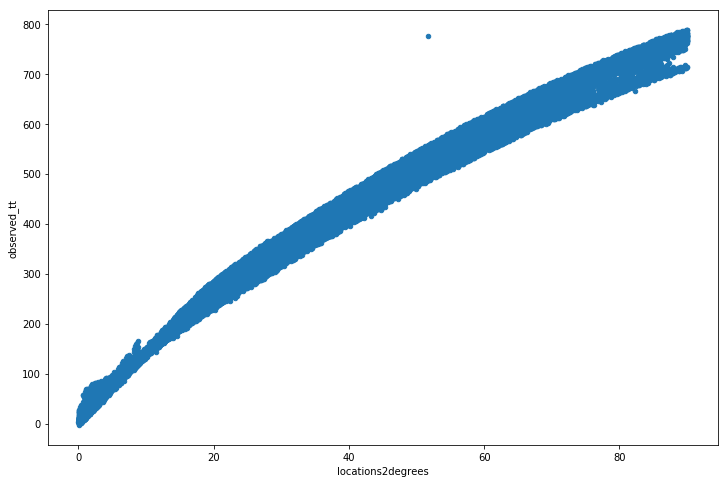

In [42]:
plt.figure(); pdf2.plot.scatter(x='locations2degrees', y='observed_tt',figsize=(12,8))

# GMT-python plotting

## need to install gmt-python in anaconda py

In [43]:
import gmt

In [44]:
my_region = [pdf2.source_longitude.min() , pdf2.source_longitude.max() ,
            pdf2.source_latitude.min() - 1, pdf2.source_latitude.max() + 1]


In [45]:
print (my_region)

[-179.9995, 179.9997, -78.1883, 87.0232]


/g/data1a/ha3/fxz547/miniconda3/lib/python3.6/site-packages/gmt/clib/utils.py:240: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return vector.as_matrix()


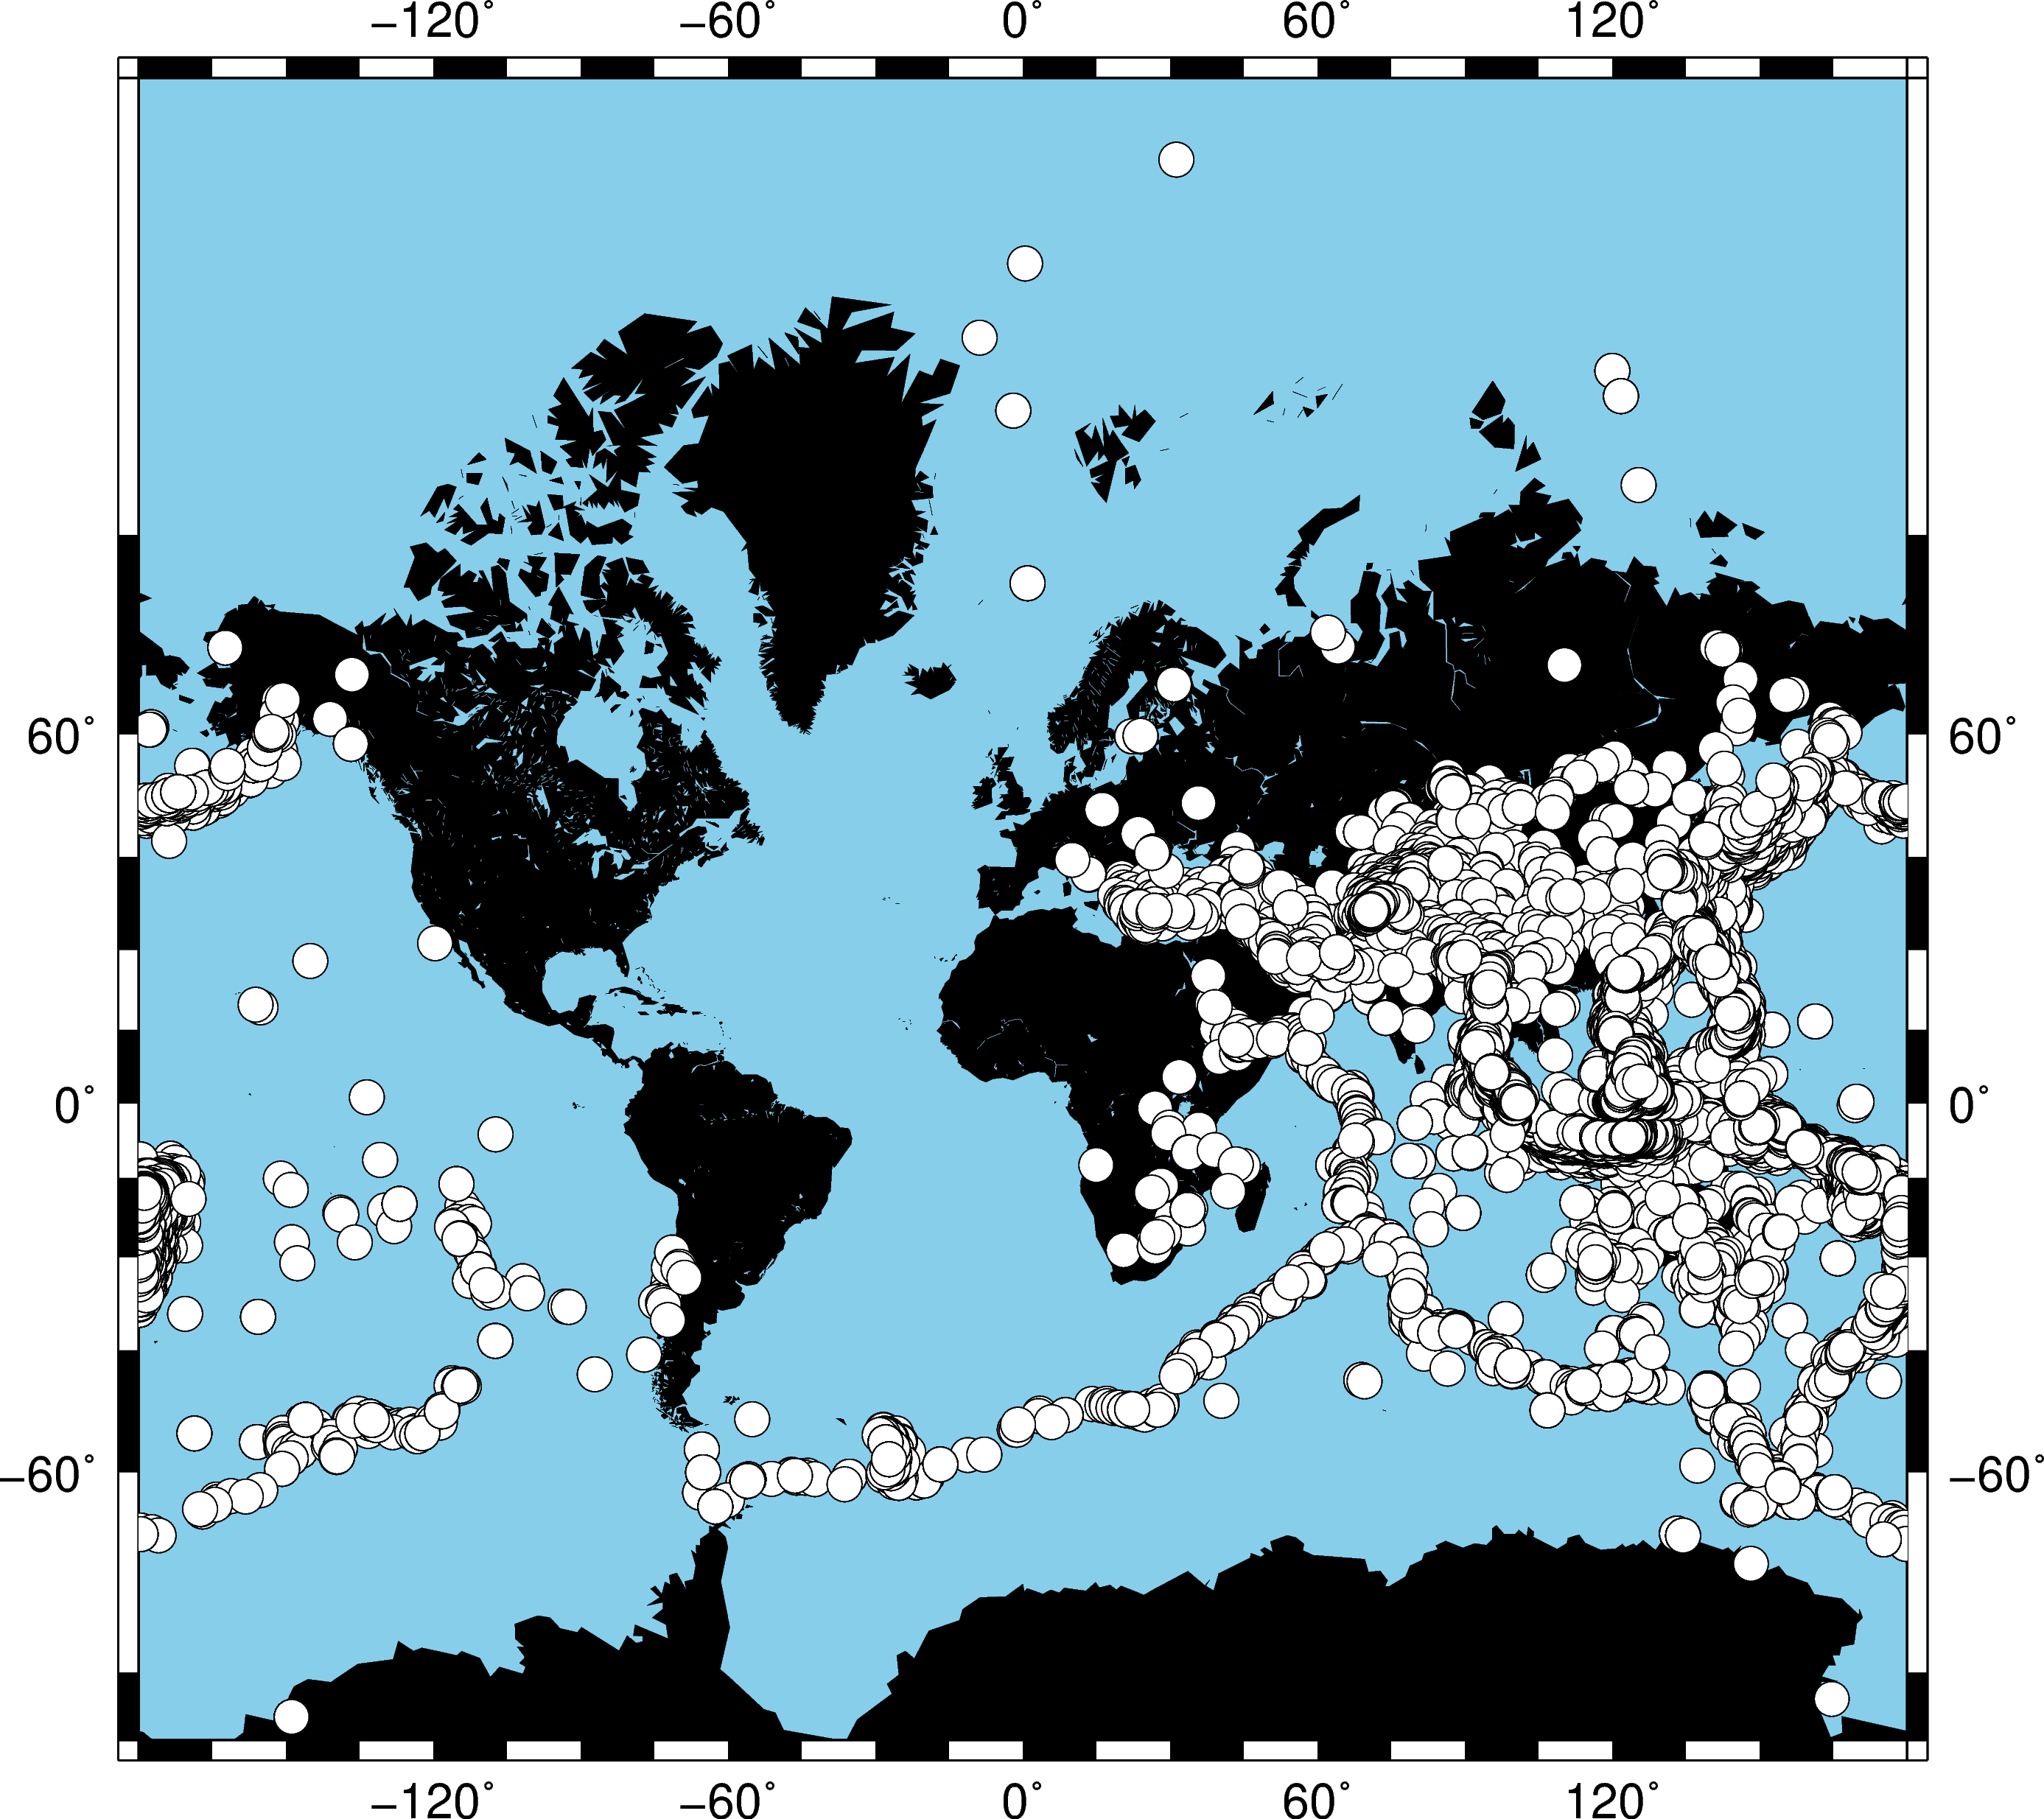

In [46]:
fig = gmt.Figure()
fig.coast(region=my_region, projection='M6i', frame=True, 
          land='black', water='skyblue')
fig.plot(x=pdf2.source_longitude, y=pdf2.source_latitude, 
         style='c0.3c', color='white', pen='black')

fig.savefig("events.png")

fig.show(dpi=400, width=1000)

/g/data1a/ha3/fxz547/miniconda3/lib/python3.6/site-packages/gmt/clib/utils.py:240: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return vector.as_matrix()


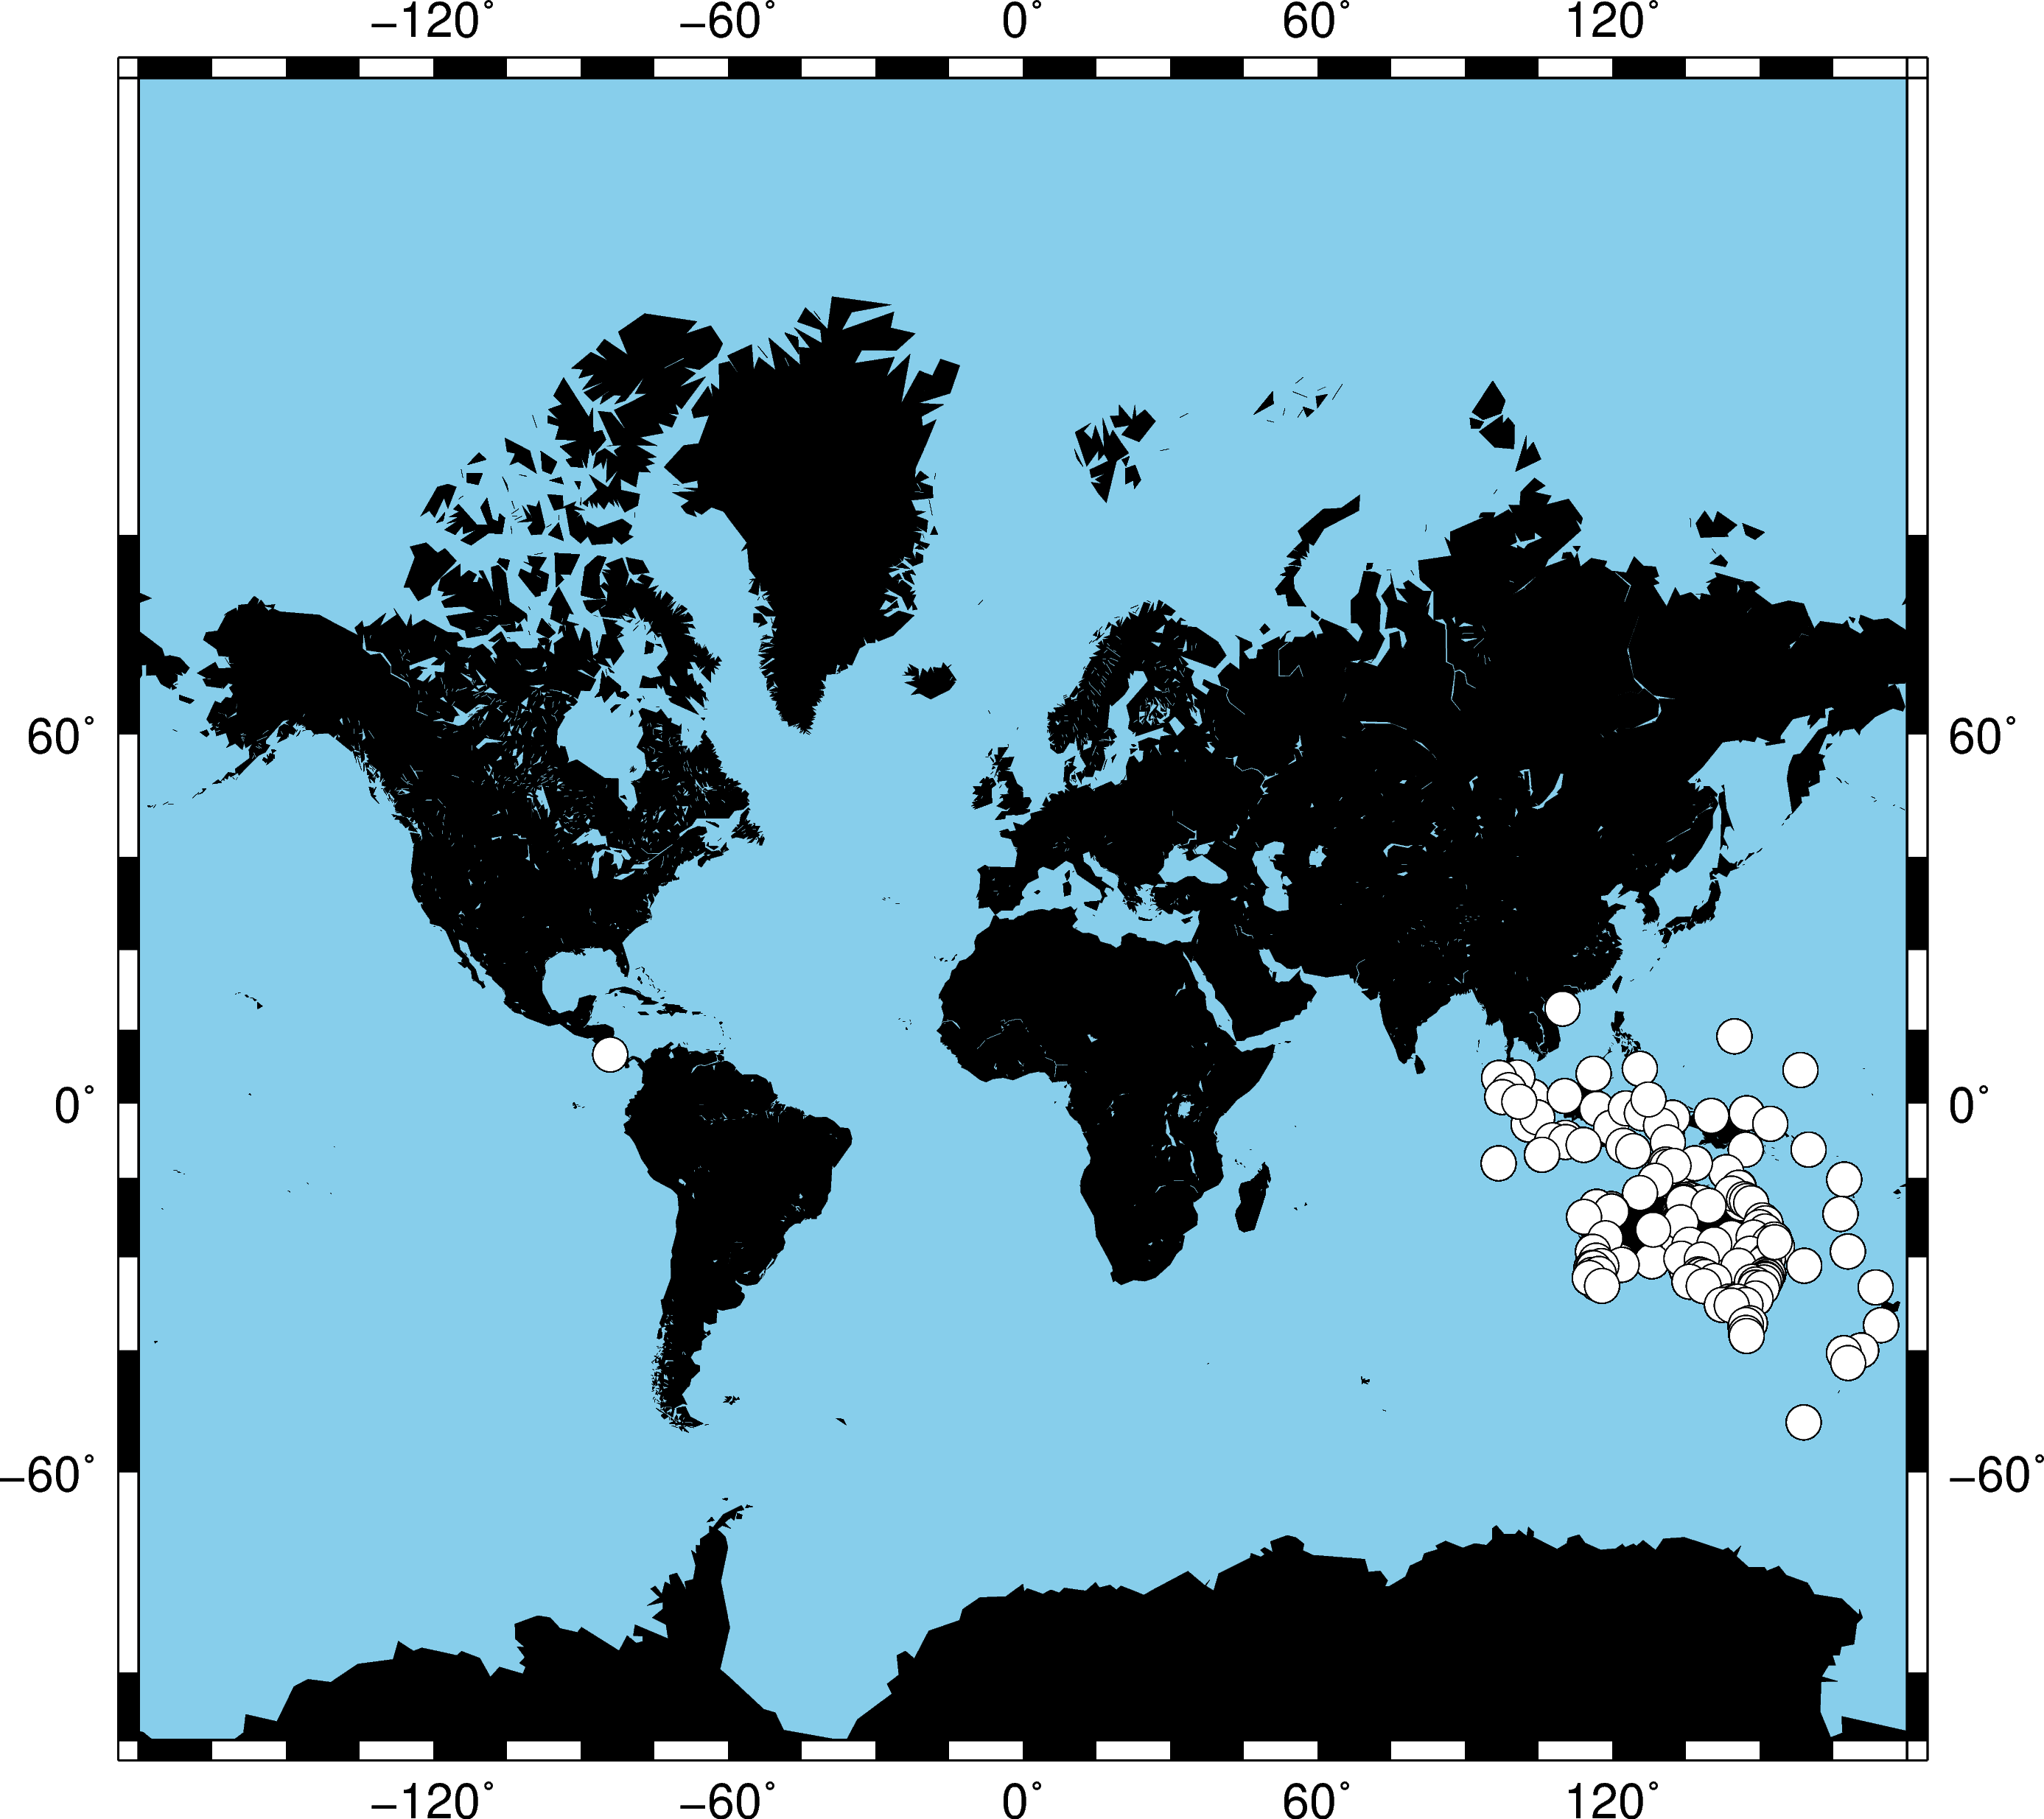

In [47]:
fig = gmt.Figure()
fig.coast(region=my_region, projection='M6i', frame=True,land='black', water='skyblue')
fig.plot(x=pdf2.station_longitude, y=pdf2.station_latitude, 
         style='c0.3c', color='white', pen='black')

fig.savefig("station.png")
fig.show(dpi=400, width=1000)

In [48]:
fig = gmt.Figure()
fig.coast(projection='M6i', frame=True, 
          land='black', water='skyblue')
fig.plot(x=pdf2.source_longitude, y=pdf2.source_latitude, 
         style='c0.3c', color='white', pen='black')
fig.show(method='globe',dpi=400, width=1000)

/g/data1a/ha3/fxz547/miniconda3/lib/python3.6/site-packages/gmt/clib/utils.py:240: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return vector.as_matrix()


In [49]:
!stop here

/bin/sh: stop: command not found


# Geopandas and Maps

In [57]:
import geopandas as gpd

In [59]:

from shapely.geometry import mapping
from shapely.geometry import Point

%matplotlib inline
from IPython.display import display




In [61]:
event_locations = [Point(xy) for xy in zip(pdf2.source_longitude, pdf2.source_latitude)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry=event_locations)

Text(0.5,1,'event locations')

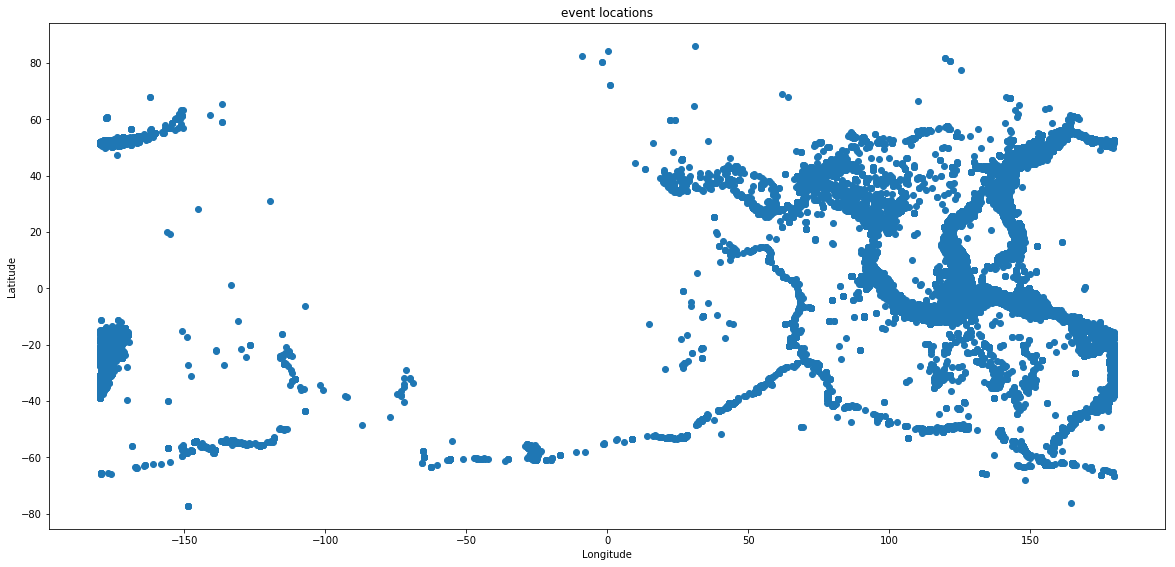

In [66]:
myax = geopdf.plot(figsize=[20,10])


myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
title_str= "event locations"
myax.set_title(title_str)

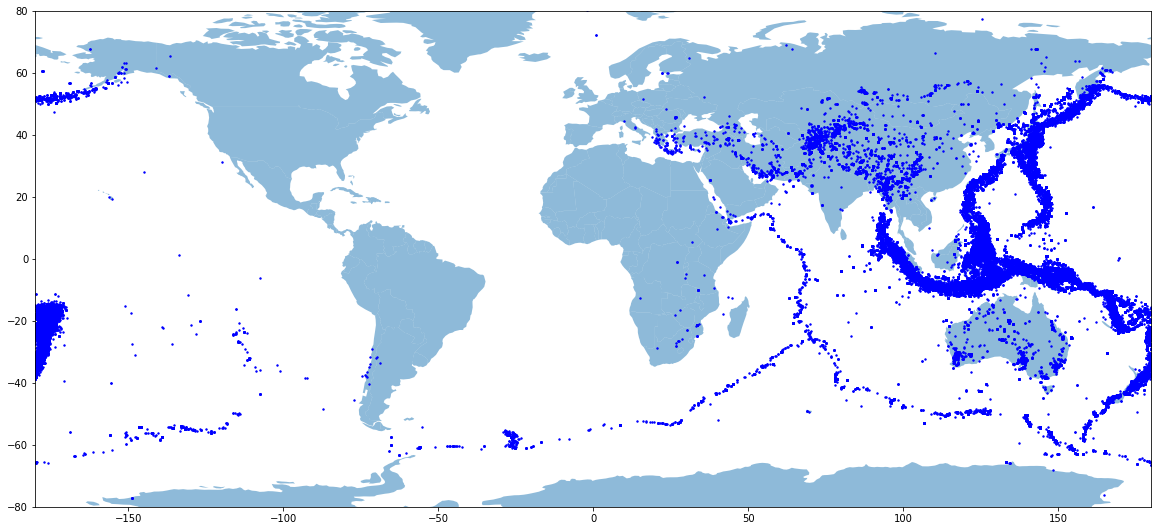

In [71]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 10))

myax.set_xlim([-180,180])
myax.set_ylim([-80,80])
              
geopdf.plot(ax=myax, marker='o', color='blue', markersize=2);

In [65]:
from shapely.geometry import Point, Polygon, LineString, LinearRing

In [74]:

mycrs = {'init': 'epsg:4326'}  # WGS84

#geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

pdf2['ray']= pdf2.apply(lambda x: LineString([(x.source_longitude, x.source_latitude), 
                (x.station_longitude, x.station_latitude)]), axis=1)


geopdf_ray = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry='ray')


Text(0.5,1,'event->station Rays')

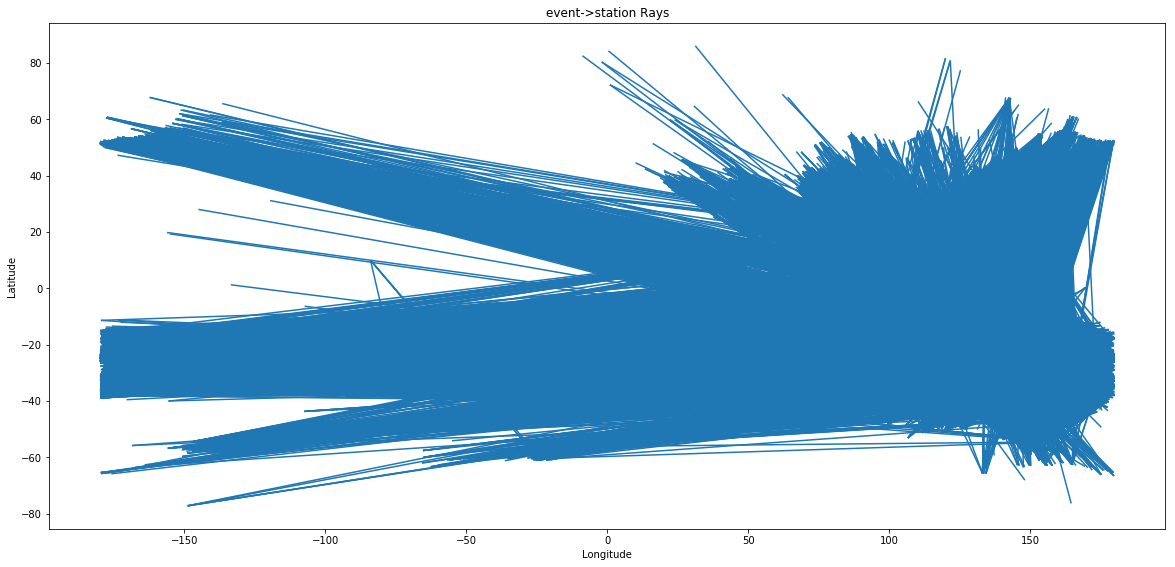

In [78]:
myax=geopdf_ray.plot(figsize=[20,10])

myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
title_str= "event->station Rays"
myax.set_title(title_str)

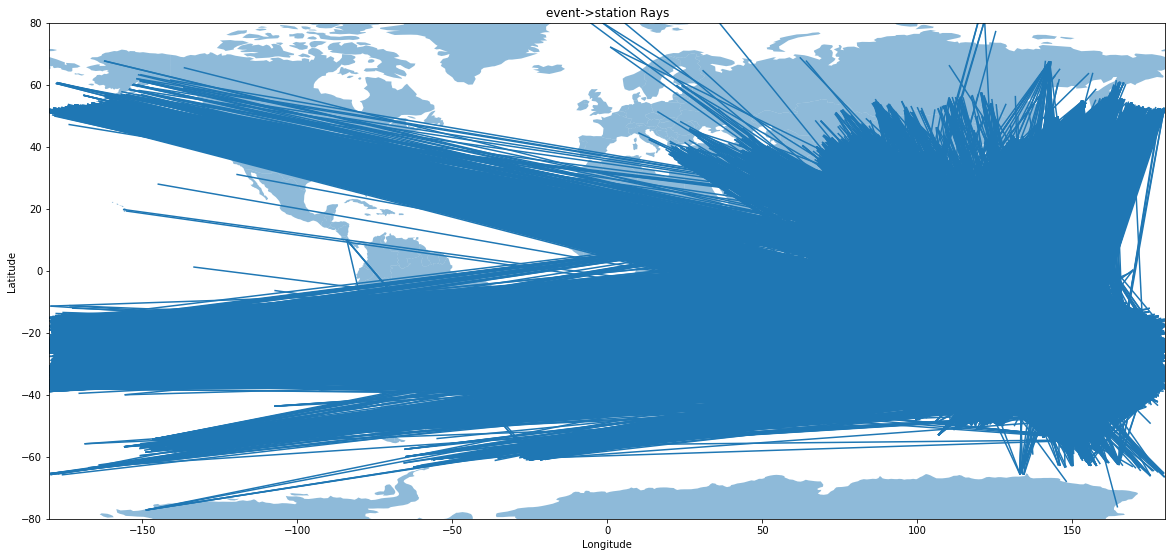

In [81]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mymap=world.plot(alpha=0.5,  figsize=(20, 10))

mymap.set_xlim([-180,180])
mymap.set_ylim([-80,80])
mymap.set_xlabel('Longitude')
mymap.set_ylabel('Latitude')
title_str= "event->station Rays"
mymap.set_title(title_str)

geopdf_ray.plot(ax=mymap)